In [1]:
! pip install xgboost
! pip install prettytable 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report,roc_auc_score,roc_curve, plot_confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
import statistics
import time
from collections import Counter
from prettytable import PrettyTable 
#Import require packages and libraries

**Import Dataset**

In [2]:
df =pd.read_csv ('/home/jovyan/Onlineshoppersdata(1).csv')

# <font color='red'>**Classification Algortihms with imbalanced dataset**</font>

> **Sometimes we may face a large imbalance of the target value in the dataset. This dataset has a large imbalance of the class label, because of this, I am usinfStratified k-Fold, which is a variation of the standard k-Fold CV technique which is designed to be effective in such cases of target imbalance. Stratified k-Fold splits the dataset on k folds such that each fold contains approximately the same percentage of samples of each target class as the complete set.**

In [3]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
X = df.drop(['Revenue'],axis=1).values   
y = df['Revenue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 8338, 1: 1526})
Counter({0: 2084, 1: 382})


In [4]:
# convert to DMatrix
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

>**I will use 10-fold cross validation because of the desirable low bias and variance properties of the performance estimate**

## **Random Forest with Stratified K-Fold Cross Validation**


> **Random Forest is a tree-based model and hence does not require feature scaling.**

Fold  1 
 Confusion matrix:  



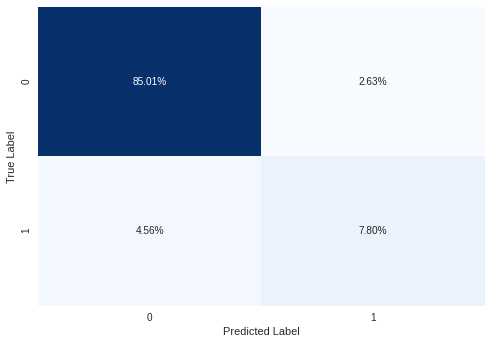

Fold  2 
 Confusion matrix:  



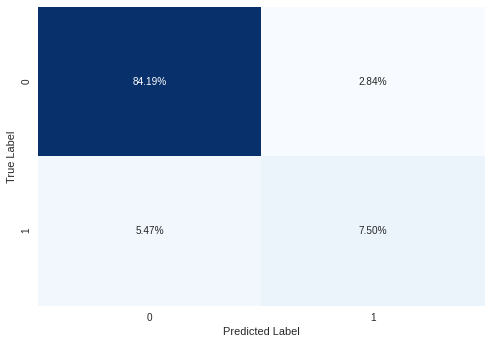

Fold  3 
 Confusion matrix:  



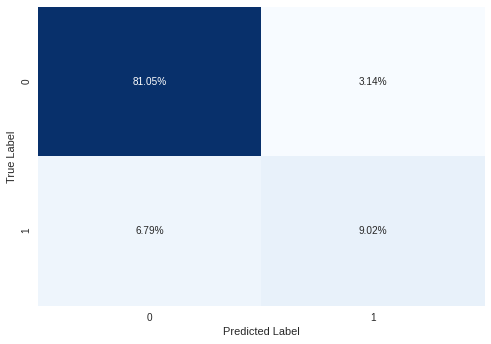

Fold  4 
 Confusion matrix:  



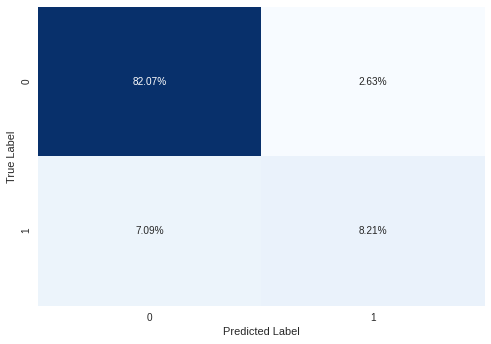

Fold  5 
 Confusion matrix:  



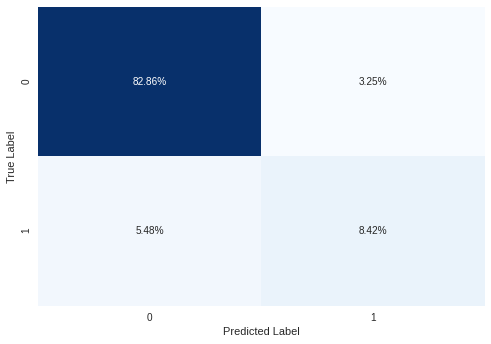

Fold  6 
 Confusion matrix:  



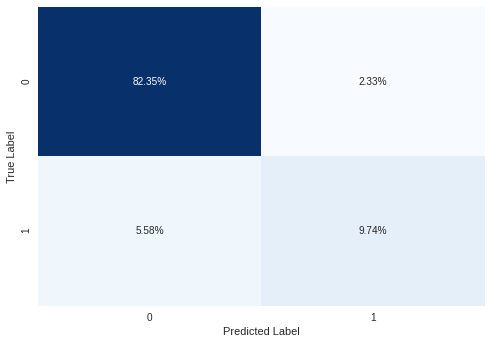

Fold  7 
 Confusion matrix:  



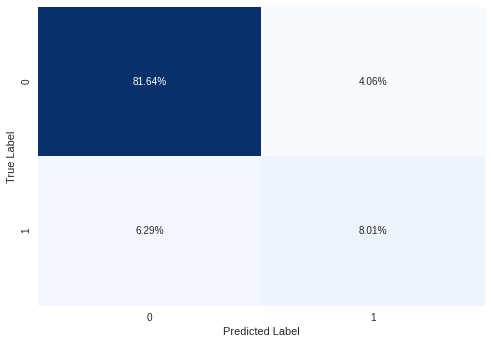

Fold  8 
 Confusion matrix:  



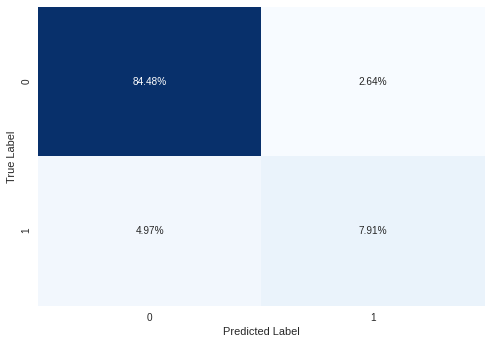

Fold  9 
 Confusion matrix:  



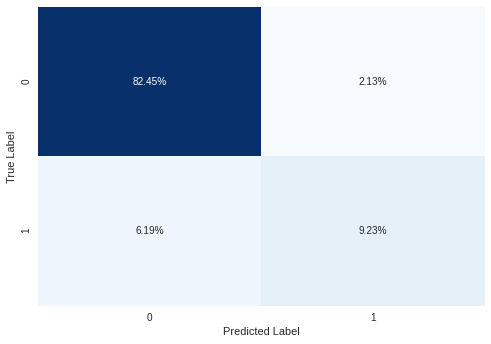

Fold  10 
 Confusion matrix:  



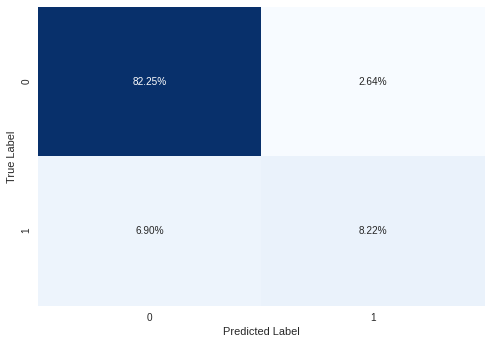

In [33]:
start_time = time.time()

accuracies = []
recalls=[]
precisions=[]
f1score=[]
matt1=[]
spe_rf=[]

forest= RandomForestClassifier(random_state=42)

i=1

skf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)#use of  Stratified Kfold cross validation to train the model using the Train set

for train_index, test_index in skf.split(X_train, y_train):
    X_train_rf, X_test_rf = X[train_index], X[test_index]
    y_train_rf, y_test_rf= y[train_index], y[test_index]

    forest.fit(X_train_rf, y_train_rf)

    y_pred_rf=forest.predict(X_test_rf)
    
    accuracy = accuracy_score(y_test_rf,y_pred_rf)
    f1= f1_score(y_test_rf,y_pred_rf, average='weighted')
    recall= recall_score(y_test_rf,y_pred_rf, average='weighted')
    precision = precision_score(y_test_rf,y_pred_rf, average='weighted') 
    mcc=matthews_corrcoef(y_test_rf,y_pred_rf)
      
    accuracies.append(accuracy)
    f1score.append(f1)
    recalls.append(recall)
    precisions.append(precision)
    matt1.append(mcc)
    
    cf_matrix=confusion_matrix(y_test_rf, y_pred_rf,labels=forest.classes_)#calculate confusion matrix
    specificity_rf = cf_matrix[1][1]/(cf_matrix[1][1]+cf_matrix[0][1])#calculate specificity
    
    spe_rf.append(specificity_rf)

    print("Fold ", i,"\n", "Confusion matrix: ","\n")
    
    heatmap = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label") 
    plt.ylabel("True Label")
    plt.show()
    
    i=i+1
time_forest=(time.time() - start_time)
time_forest=("--- %s seconds ---" % (time_forest))
average_accuracy = round(np.mean(accuracies)*100,2)
average_f1 = round(np.mean(f1score)*100,2)
average_recall =round(np.mean(recalls)*100,2)
average_precision = round(np.mean(precisions)*100,2)
average_mcc=round(np.mean(matt1)*100,2)
average_specificity_rf=round(np.mean(spe_rf)*100,2)

In [34]:
print('No of folds for Random Forest ' + str(i-1))
print('This is the average accuracy of all the folds ' + str(average_accuracy))
print('This is the average F1 Score of all the folds ' + str(average_f1))
print('This is the average Recall  of all the folds ' + str(average_recall))
print('This is the average Precision of all the folds ' + str(average_precision))
print('This is the average MCC of all the folds ' + str(average_mcc))
print('This is the average Specificity of all the folds ' + str(average_specificity_rf))

No of folds for Random Forest 10
This is the average accuracy of all the folds 91.24
This is the average F1 Score of all the folds 90.79
This is the average Recall  of all the folds 91.24
This is the average Precision of all the folds 90.69
This is the average MCC of all the folds 61.45
This is the average Specificity of all the folds 74.84


## **XGBoost Model With k-Fold Cross Validation**

 > **Data normalization is not necessary for decision trees. Since XGBoost is based on decision trees, is not necessary to do data normalization**

In [7]:
start_time = time.time()
params_1 = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.1,
    'objective': 'binary:hinge',
    'eval_metric':'logloss',
    'random_state':42,
    }

Fold  1 
 Confusion matrix:  



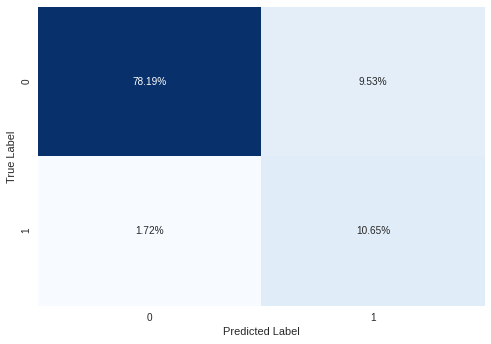

Fold  2 
 Confusion matrix:  



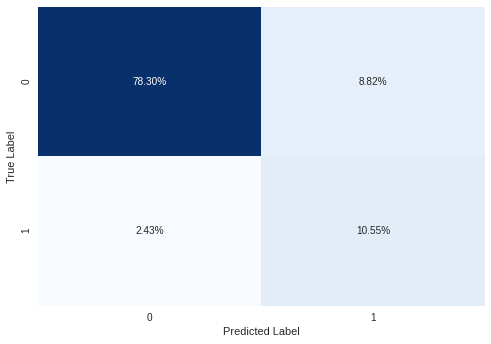

Fold  3 
 Confusion matrix:  



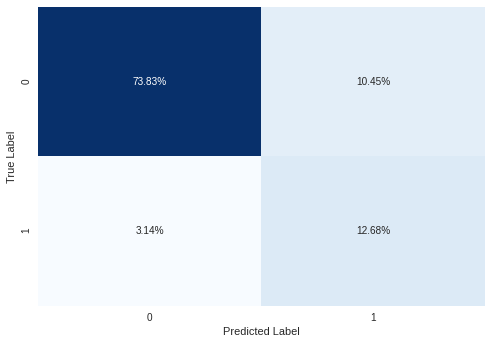

Fold  4 
 Confusion matrix:  



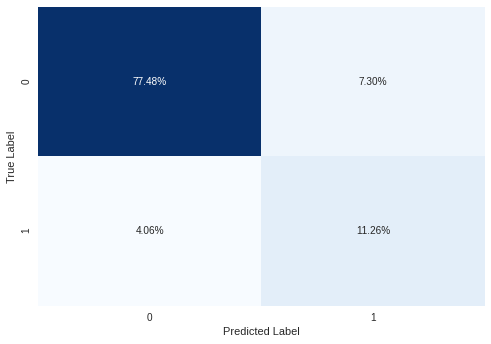

Fold  5 
 Confusion matrix:  



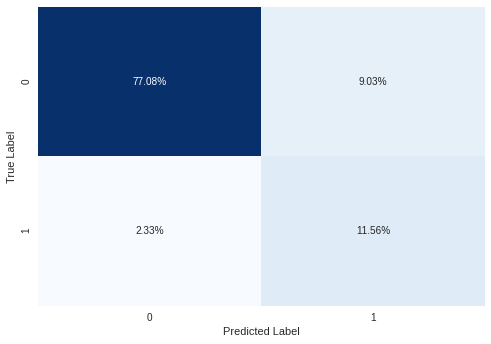

Fold  6 
 Confusion matrix:  



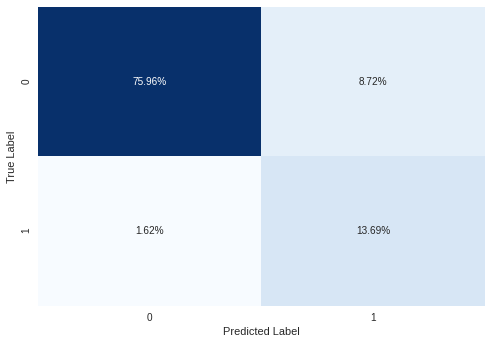

Fold  7 
 Confusion matrix:  



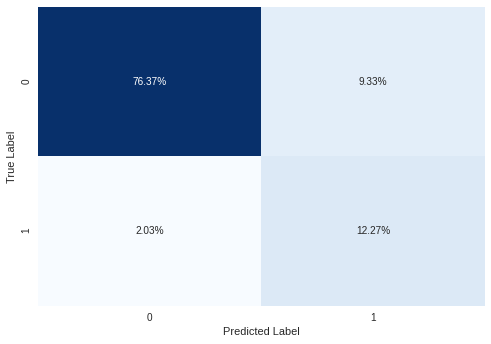

Fold  8 
 Confusion matrix:  



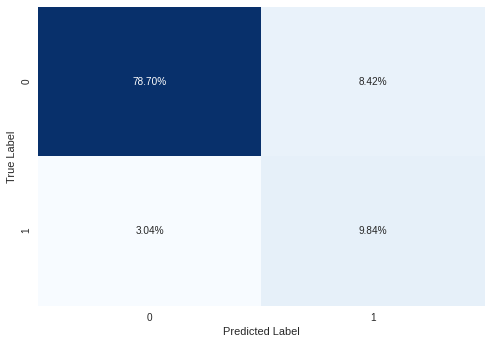

Fold  9 
 Confusion matrix:  



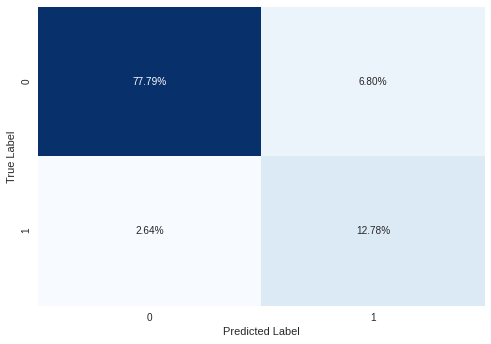

Fold  10 
 Confusion matrix:  



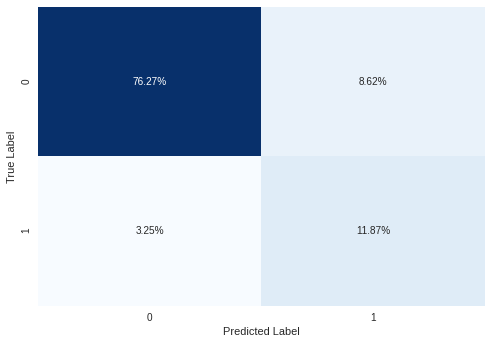

In [35]:
accuracies_xg=[]
recalls_xg=[]
precisions_xg=[]
f1score_xg=[]
matt2=[]
spe_xg=[]

i=1

skf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)#use of  Stratified Kfold cross validation to train the model using the Train set

for train_index, test_index in skf.split(X_train, y_train):
    X_train_xg, X_test_xg = X[train_index], X[test_index]

    y_train_xg, y_test_xg = y[train_index], y[test_index]
    
    # convert to DMatrix
    d_train = xgb.DMatrix(X_train_xg, y_train_xg)
    d_test = xgb.DMatrix(X_test_xg, y_test_xg)
    #DMatrix is an optimized data structure that provides better memory efficiency and training speed,is an internal data structure that helps with memory management and data optimization. 

    modelxg = xgb.train(params_1, d_train)
    y_pred_xg = modelxg.predict(d_test)
 
    accuracy_xg = accuracy_score(y_pred_xg,y_test_xg)
    f1_xg= f1_score(y_pred_xg,y_test_xg, average='weighted')
    recall_xg= recall_score(y_pred_xg,y_test_xg, average='weighted')
    precision_xg = precision_score(y_pred_xg,y_test_xg, average='weighted')
    mcc_xg=matthews_corrcoef(y_pred_xg,y_test_xg)
      
    accuracies_xg.append(accuracy_xg)
    f1score_xg.append(f1_xg)
    recalls_xg.append(recall_xg)
    precisions_xg.append(precision_xg)
    matt2.append(mcc_xg)
    
    cf_matrix_xg=confusion_matrix(y_test_xg, y_pred_xg)#calculate confusion matrix
    specificity_xg = cf_matrix_xg[1][1]/(cf_matrix_xg[1][1]+cf_matrix_xg[0][1])#calculate specificity

    spe_xg.append(specificity_xg)
    
    print("Fold ", i,"\n", "Confusion matrix: ","\n")
    heatmap = sns.heatmap(cf_matrix_xg/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label") 
    plt.ylabel("True Label")
    plt.show()
    
    i=i+1

time_xg=(time.time() - start_time)
time_xg=("--- %s seconds ---" % (time_xg))
average_accuracy_xg = round(np.mean(accuracies_xg)*100,2)
average_f1_xg = round(np.mean(f1score_xg)*100,2)
average_recall_xg =round(np.mean(recalls_xg)*100,2)
average_precision_xg = round(np.mean(precisions_xg)*100,2)
average_mcc_xg=round(np.mean(matt2)*100,2)
average_specificity_xg=round(np.mean(spe_xg)*100,2)

In [36]:
print('No of Folds for XGBoost: '+str(i-1))
print('This is the average accuracy of all the folds ' + str(average_accuracy_xg))
print('This is the average F1 Score of all the folds ' + str(average_f1_xg))
print('This is the average Recall  of all the folds ' + str(average_recall_xg))
print('This is the average Precision of all the folds ' + str(average_precision_xg))
print('This is the average MCC of all the folds ' + str(average_mcc_xg))
print('This is the average Specificity of all the folds ' + str(average_specificity_xg))

No of Folds for XGBoost: 10
This is the average accuracy of all the folds 88.68
This is the average F1 Score of all the folds 87.89
This is the average Recall  of all the folds 88.68
This is the average Precision of all the folds 88.24
This is the average MCC of all the folds 62.18
This is the average Specificity of all the folds 57.38


## **Naive Bayes With k-Fold Cross Validation**

>  **As Naive Bayes algorithm is based on probability not on distance, so it doesn't require feature scaling. Gaussian Naıve Bayes is a powerful algorithm used for model prediction. It is a variant of Naiıve Bayes which works with continuous variables. The dataset used in this research mostly comprises continuous variables and hence Gaussian Naıve Bayes was implemented. Gaussian Naıve Bayes is well known for its simplicity with low time and space complexity, as it only has to store probabilistic values that consume less space and computers faster**


Fold  1 
 Confusion matrix:  



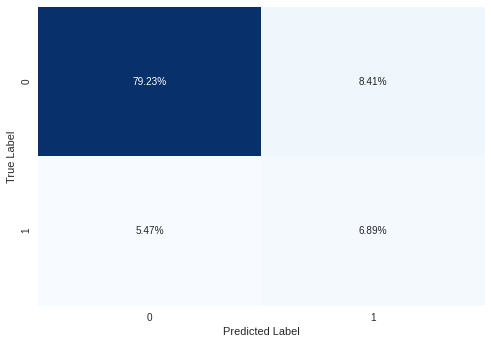

Fold  2 
 Confusion matrix:  



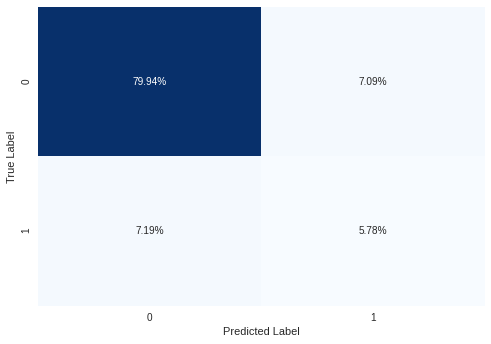

Fold  3 
 Confusion matrix:  



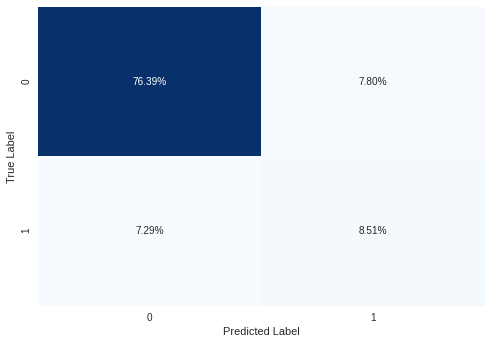

Fold  4 
 Confusion matrix:  



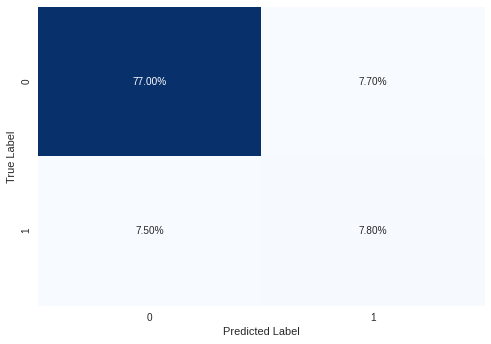

Fold  5 
 Confusion matrix:  



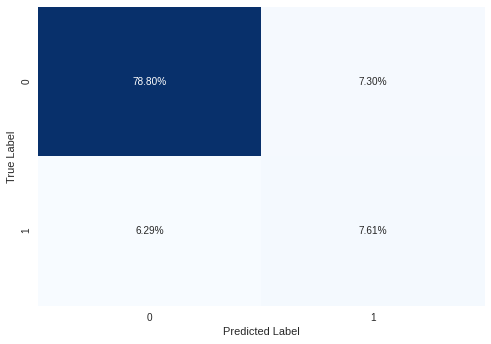

Fold  6 
 Confusion matrix:  



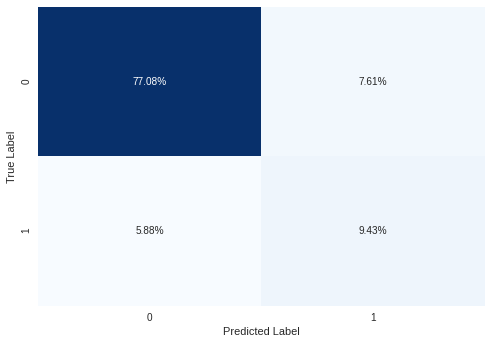

Fold  7 
 Confusion matrix:  



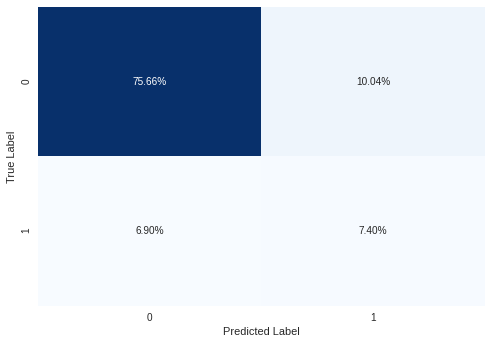

Fold  8 
 Confusion matrix:  



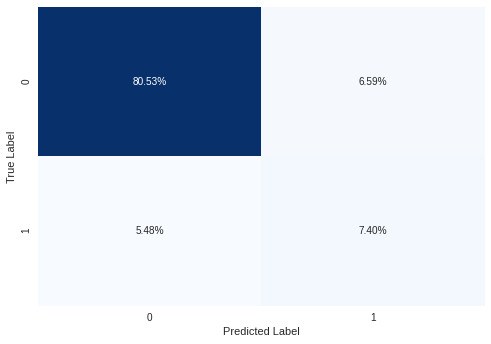

Fold  9 
 Confusion matrix:  



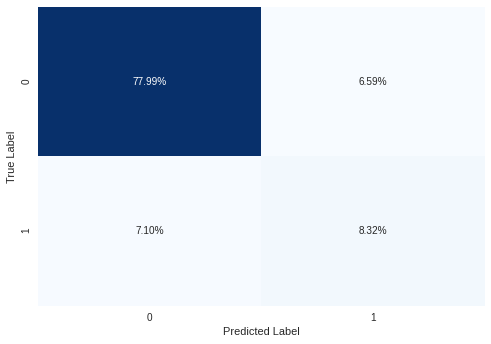

Fold  10 
 Confusion matrix:  



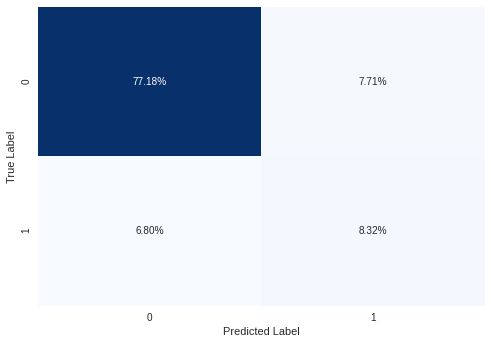

In [37]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()

model_nb = GaussianNB()

accuracies_nb = []
recalls_nb=[]
precisions_nb=[]
f1score_nb=[]
matt3=[]
spe_nb=[]

i=1
skf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)#use of  Stratified Kfold cross validation to train the model using the Train set

for train_index, test_index in skf.split(X_train, y_train):
    X_train_nb, X_test_nb = X[train_index], X[test_index]
    y_train_nb, y_test_nb = y[train_index], y[test_index]

    model_nb.fit(X_train_nb, y_train_nb)
    
    y_pred_nb=model_nb.predict(X_test_nb)
        
    accuracy_nb = accuracy_score(y_test_nb,y_pred_nb)
    f1_nb= f1_score(y_test_nb,y_pred_nb, average='weighted')
    recall_nb= recall_score(y_test_nb,y_pred_nb, average='weighted')
    precision_nb = precision_score(y_test_nb,y_pred_nb, average='weighted')
    mcc_nb=matthews_corrcoef(y_test_nb,y_pred_nb)
      
    accuracies_nb.append(accuracy_nb)
    f1score_nb.append(f1_nb)
    recalls_nb.append(recall_nb)
    precisions_nb.append(precision_nb)
    matt3.append(mcc_nb)
    
    cf_matrix_nb=confusion_matrix(y_test_nb,y_pred_nb,labels=model_nb.classes_)#calculate confusion matrix
    specificity_nb = cf_matrix_nb[1][1]/(cf_matrix_nb[1][1]+cf_matrix_nb[0][1])#calculate specificity

    spe_nb.append(specificity_nb)
    
    print("Fold ", i,"\n", "Confusion matrix: ","\n")
    heatmap = sns.heatmap(cf_matrix_nb/np.sum(cf_matrix_nb), annot=True,fmt='.2%', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label") 
    plt.ylabel("True Label")
    plt.show()    
   
    i=i+1

time_nb=(time.time() - start_time)
time_nb=("--- %s seconds ---" % (time_nb))
average_accuracy_nb = round(np.mean(accuracies_nb)*100,2)
average_f1_nb = round(np.mean(f1score_nb)*100,2)
average_recall_nb =round(np.mean(recalls_nb)*100,2)
average_precision_nb = round(np.mean(precisions_nb)*100,2)
average_mcc_nb = round(np.mean(matt3)*100,2)
average_specificity_nb=round(np.mean(spe_nb)*100,2)

In [38]:
print('No of Folds for Naive Bayes: '+str(i-1))
print('This is the average accuracy of all the folds ' + str(average_accuracy_nb))
print('This is the average F1 Score of all the folds ' + str(average_f1_nb))
print('This is the average Recall  of all the folds ' + str(average_recall_nb))
print('This is the average Precision of all the folds ' + str(average_precision_nb))
print('This is the average MCC of all the folds ' + str(average_mcc_nb))
print('This is the average Specificity of all the folds ' + str(average_specificity_nb))

No of Folds for Naive Bayes: 10
This is the average accuracy of all the folds 85.73
This is the average F1 Score of all the folds 85.95
This is the average Recall  of all the folds 85.73
This is the average Precision of all the folds 86.22
This is the average MCC of all the folds 43.65
This is the average Specificity of all the folds 50.18


> # Test Set

<strong>**After we have trained the models with train data, we proceed to test the models with previously reserved Test data**</strong>

In [12]:
forest= forest.fit(X_train, y_train)
modelxg = xgb.train(params_1, dtrain)
model_nb= model_nb.fit(X_train, y_train)   
preds_forest=forest.predict(X_test)
preds_xg = modelxg.predict(dtest)
pred_nb=model_nb.predict(X_test)

> **Metrics**

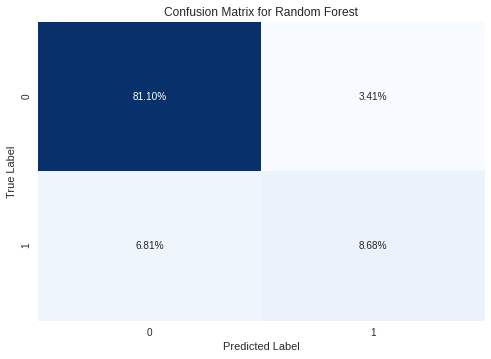

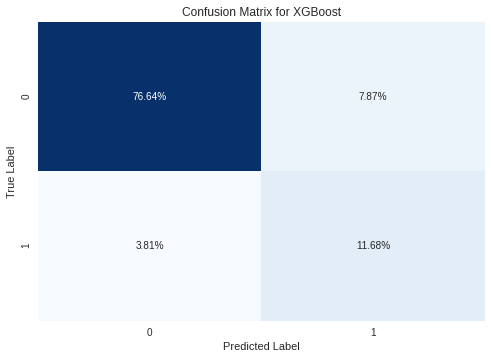

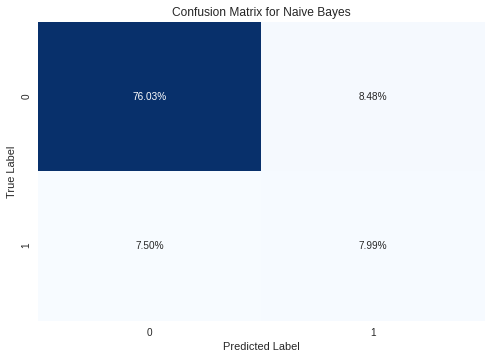

<Figure size 576x396 with 0 Axes>

In [39]:
accuracy_rf = round(accuracy_score(y_test, preds_forest)*100,2)
f1_rf= round(f1_score(y_test, preds_forest, average='weighted')*100,2)
recall_rf= round(recall_score(y_test, preds_forest, average='weighted')*100,2)
precision_rf = round(precision_score(y_test, preds_forest, average='weighted')*100,2)
matt_rf=round(matthews_corrcoef(y_test, preds_forest)*100,2)
matrix_forest=confusion_matrix(y_test, preds_forest,labels=forest.classes_)
specificity_forest = round(matrix_forest[1][1]/(matrix_forest[1][1]+matrix_forest[0][1])*100,2)
heatmap = sns.heatmap(matrix_forest/np.sum(matrix_forest), annot=True,fmt='.2%', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label") 
plt.ylabel("True Label")
plt.title('Confusion Matrix for Random Forest')
plt.show()
plt.savefig('cf rf imbalanced.png', dpi=300, bbox_inches='tight')

accuracy_xgb = round(accuracy_score(y_test, preds_xg)*100,2)
f1_xgb= round(f1_score(y_test, preds_xg, average='weighted')*100,2)
recall_xgb= round(recall_score(y_test, preds_xg, average='weighted')*100,2)
precision_xgb = round(precision_score(y_test, preds_xg, average='weighted')*100,2)
matt_xgb=round(matthews_corrcoef(y_test, preds_xg)*100,2)
matrix_xgboost=confusion_matrix(y_test, preds_xg)   
specificity_xgb = round(matrix_xgboost[1][1]/(matrix_xgboost[1][1]+matrix_xgboost[0][1])*100,2)
heatmap = sns.heatmap(matrix_xgboost/np.sum(matrix_xgboost), annot=True,fmt='.2%', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label") 
plt.ylabel("True Label")
plt.title('Confusion Matrix for XGBoost')
plt.show()
plt.savefig('cf xg imbalanced.png', dpi=300, bbox_inches='tight')

accuracy_nvb = round(accuracy_score(y_test, pred_nb)*100,2)
f1_nvb= round(f1_score(y_test, pred_nb, average='weighted')*100,2)
recall_nvb= round(recall_score(y_test, pred_nb, average='weighted')*100,2)
precision_nvb = round(precision_score(y_test, pred_nb, average='weighted')*100,2)
matt_nvb=round(matthews_corrcoef(y_test, pred_nb),2)*100
matrix_nvb=confusion_matrix(y_test, pred_nb,labels=model_nb.classes_)   
specificity_nvb = round(matrix_nvb[1][1]/(matrix_nvb[1][1]+matrix_nvb[0][1])*100,2)
heatmap = sns.heatmap(matrix_nvb/np.sum(matrix_nvb), annot=True,fmt='.2%', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label") 
plt.ylabel("True Label")
plt.title('Confusion Matrix for Naive Bayes')
plt.show()
plt.savefig('cf nb imbalanced.png', dpi=300, bbox_inches='tight')

In [40]:
#Classification Report for each Model with test data
clsf_report_rf1=classification_report(y_test, preds_forest)
print('Classification Report for Random Forest with Test data')
print(clsf_report_rf1)

clsf_report_xg1=classification_report(y_test, preds_xg)
print('Classification Report for XGBoost with Test data')
print(clsf_report_xg1)

clsf_report_nb1=classification_report(y_test, pred_nb)
print('Classification Report for Naive Bayes with Test data')
print(clsf_report_nb1)

Classification Report for Random Forest with Test data
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.72      0.56      0.63       382

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

Classification Report for XGBoost with Test data
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2084
           1       0.60      0.75      0.67       382

    accuracy                           0.88      2466
   macro avg       0.78      0.83      0.80      2466
weighted avg       0.90      0.88      0.89      2466

Classification Report for Naive Bayes with Test data
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2084
           1       0.49      0.52      0.50       382

    accuracy             

In [41]:
# predict probabilities
pred_prob1 = forest.predict_proba(X_test)
pred_prob2 = model_nb.predict_proba(X_test)
pred_prob3= modelxg.predict(dtest)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3= roc_curve(y_test,pred_prob3,pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = round(roc_auc_score(y_test, pred_prob1[:,1],average='weighted')*100,2)
auc_score2 = round(roc_auc_score(y_test, pred_prob2[:,1],average='weighted')*100,2)
auc_score3 = round(roc_auc_score(y_test,preds_xg,average='weighted')*100,2)

> **Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.**

In [42]:
# Specify the Column Names while initializing the Table 
traintable= PrettyTable(["Metrics/Classifier", "Random Forest", "XGBoost", "Naive Bayes"]) 
  
# Add rows 
traintable.add_row(["Accuracy", average_accuracy, average_accuracy_xg, average_accuracy_nb]) 
traintable.add_row(["Precision", average_precision, average_precision_xg, average_precision_nb]) 
traintable.add_row(["Recall", average_recall, average_recall_xg, average_recall_nb]) 
traintable.add_row(["F1 Score", average_f1, average_f1_xg, average_f1_nb])  
traintable.add_row(["MCC", average_mcc, average_mcc_xg, average_mcc_nb]) 
traintable.add_row(["Specificity", average_specificity_rf, average_specificity_xg, average_specificity_nb]) 
traintable.add_row(["Time", time_forest, time_xg, time_nb]) 

print('Comparisson of metrics with Training Set using Kfold Stratified cross Validation - Imbalanced Dataset')
print(traintable)

Comparisson of metrics with Training Set using Kfold Stratified cross Validation - Imbalanced Dataset
+--------------------+------------------------------------+------------------------------------+------------------------------------+
| Metrics/Classifier |           Random Forest            |              XGBoost               |            Naive Bayes             |
+--------------------+------------------------------------+------------------------------------+------------------------------------+
|      Accuracy      |               91.24                |               88.68                |               85.73                |
|     Precision      |               90.69                |               88.24                |               86.22                |
|       Recall       |               91.24                |               88.68                |               85.73                |
|      F1 Score      |               90.79                |               87.89               

In [43]:
# Specify the Column Names while initializing the Table 
testable = PrettyTable(["Metrics/Classifier", "Random Forest", "XGBoost", "Naive Bayes"]) 

# Add rows 
testable.add_row(["Accuracy", accuracy_rf, accuracy_xgb, accuracy_nvb]) 
testable.add_row(["Precision", precision_rf, precision_xgb, precision_nvb]) #The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
testable.add_row(["Recall", recall_rf, recall_xgb, recall_nvb]) #The recall is intuitively the ability of the classifier to find all the positive samples.
testable.add_row(["F1 Score", f1_rf, f1_xgb, f1_nvb]) #The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
testable.add_row(["AUC Score", auc_score1, auc_score2, auc_score3]) 
testable.add_row(["MCC", matt_rf, matt_xgb, matt_nvb]) #The Matthews correlation coefficient (+1 represents a perfect prediction, 0 an average random prediction and -1 and inverse prediction).
testable.add_row(["Specificity", specificity_forest, specificity_xgb, specificity_nvb]) 
testable.add_row(["Time for trainning", time_forest, time_xg, time_nb]) 

print('Comparisson of metrics with Test Set previously reserved -  Models were trained Imbalanced Dataset')
print(testable)

Comparisson of metrics with Test Set previously reserved -  Models were trained Imbalanced Dataset
+--------------------+------------------------------------+------------------------------------+------------------------------------+
| Metrics/Classifier |           Random Forest            |              XGBoost               |            Naive Bayes             |
+--------------------+------------------------------------+------------------------------------+------------------------------------+
|      Accuracy      |               89.78                |               88.32                |               84.02                |
|     Precision      |               89.08                |               89.76                |               84.44                |
|       Recall       |               89.78                |               88.32                |               84.02                |
|      F1 Score      |               89.25                |               88.85                | 

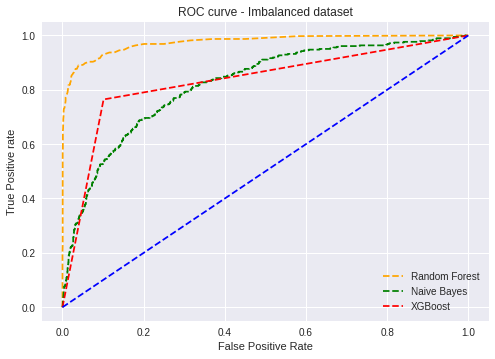

<Figure size 576x396 with 0 Axes>

In [44]:
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - Imbalanced dataset')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()
plt.savefig('roc imabalance.png', dpi=300, bbox_inches='tight')

> **The best classifier has the largest area under the curve**